## RIO-125:HR Salary Dashboard - Train the Dataset and Predict Salary

### Importing Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt#for visualisation
from sklearn.model_selection import train_test_split #for splitting data into training and test data
from sklearn.metrics import classification_report #for classification report
from sklearn.linear_model import LogisticRegression #Doing logistic regression
from sklearn.preprocessing import StandardScaler #for normalising data

### Reading the data

In [2]:
#Reading data into a variable
df = pd.read_csv("salarydata.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data cleaning

In [3]:
#Checking if there is any columns having null values

df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [4]:
#Droping columns : capital gain, capital loss,and education-num

df.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [6]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [7]:
#Checking categorical columns 

for i in df.iloc[:,2:].columns:
    print("{} : {}".format(i,list(pd.unique(df[i]))))
    
#found that '?' in columns occupation, workclass, and native-country    

education : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital-status : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex : ['Male', 'Female']
hours-per-week : [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55, 48, 58, 32, 70, 2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65, 1, 10, 34, 75, 98, 33, 54, 8, 6, 64, 19, 18, 72, 5, 9, 

### Exploratory Data Analysis (EDA)

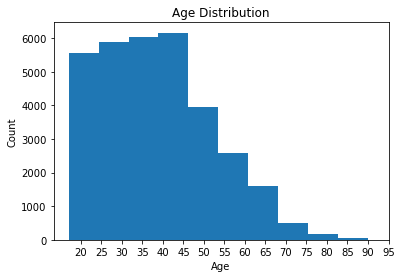

In [8]:
#age

plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

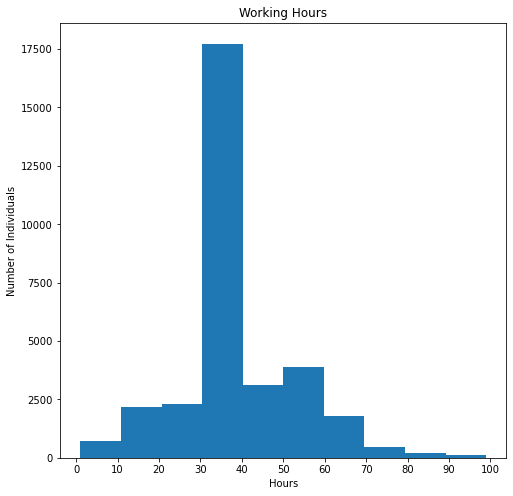

In [9]:
#hours-per-week

plt.hist(df['hours-per-week'])
plt.xlabel('Hours')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0,110,10))
plt.title('Working Hours')
plt.show()

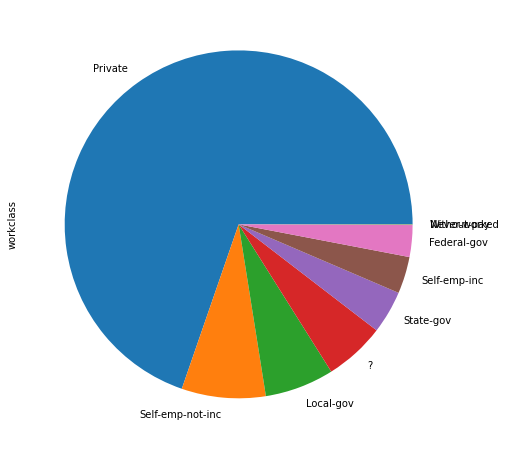

In [10]:
#workclass

df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

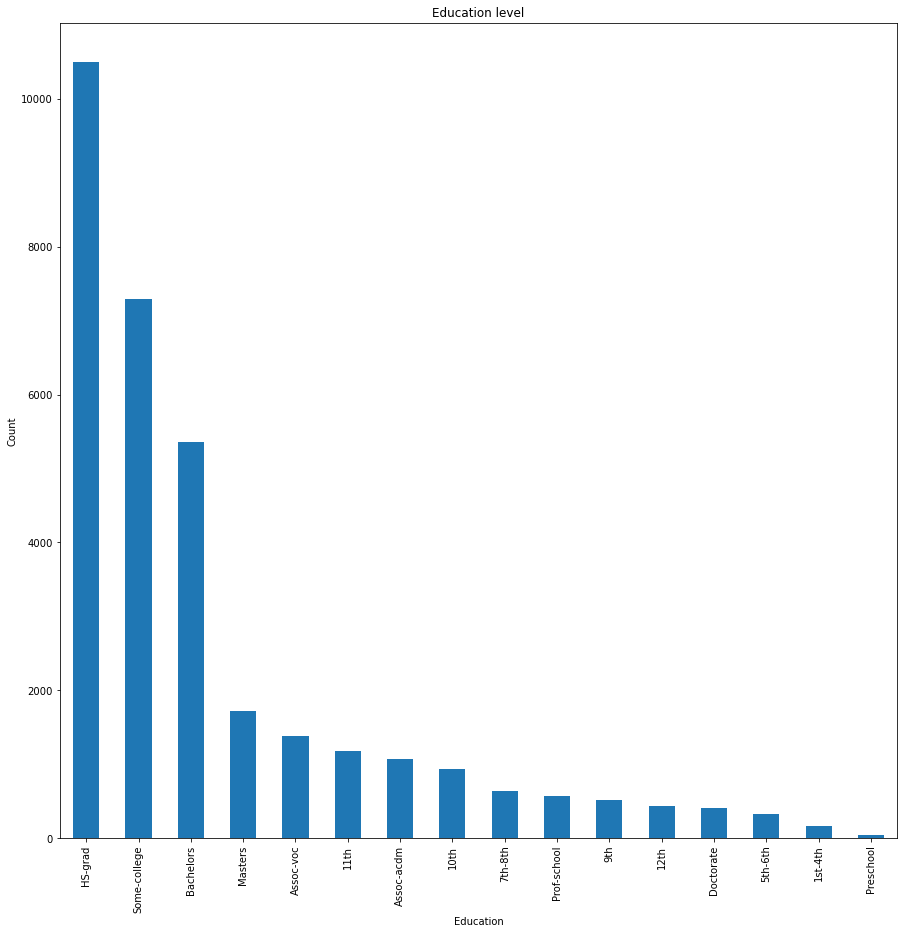

In [11]:
#education

df['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

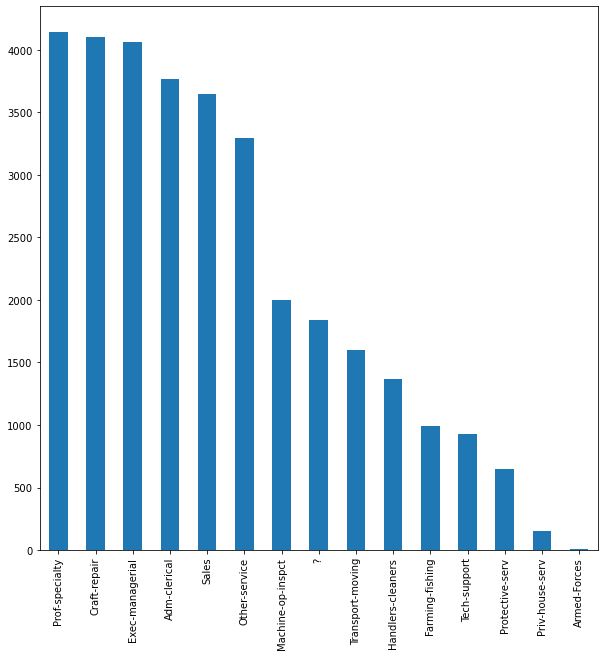

In [12]:
#occupation

df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

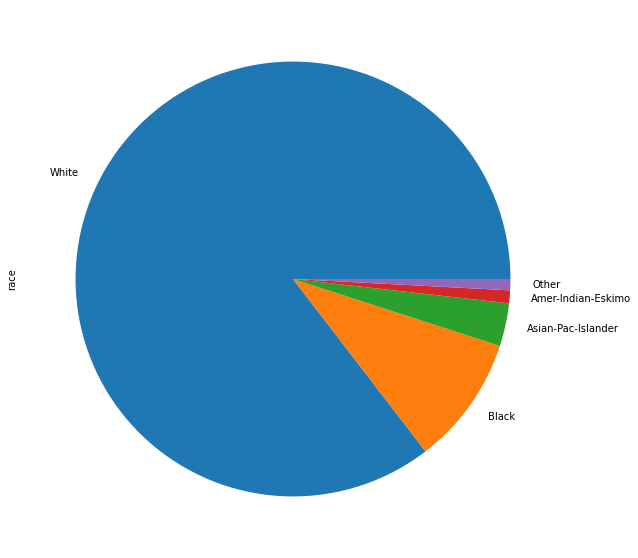

In [13]:
#race

df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

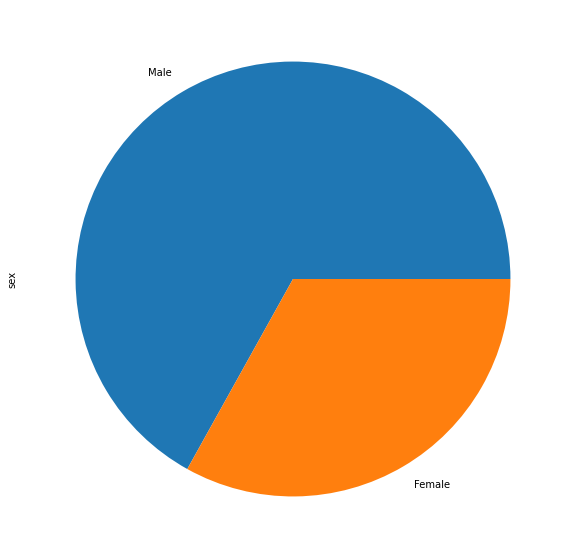

In [14]:
#sex

df['sex'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

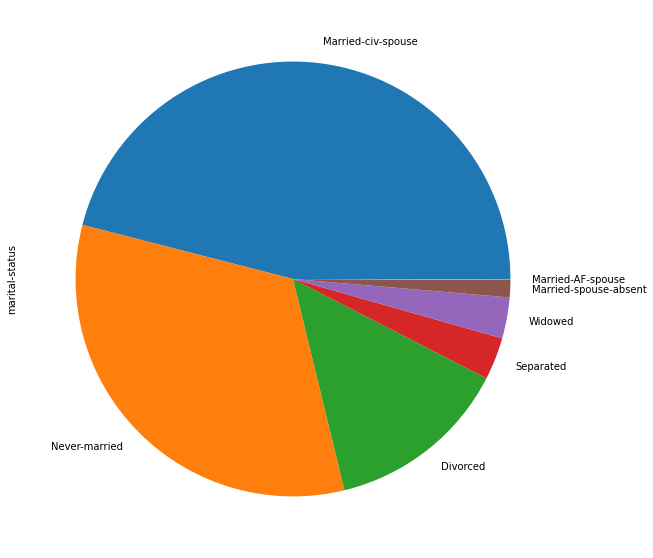

In [15]:
#marital-status

df['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

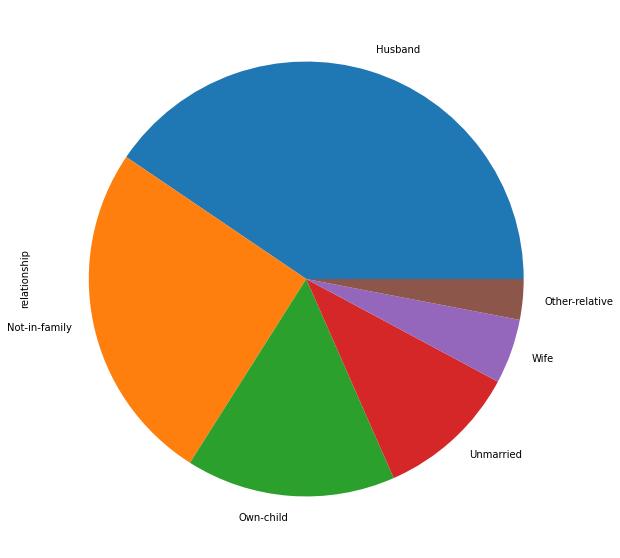

In [16]:
#relationship

df['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

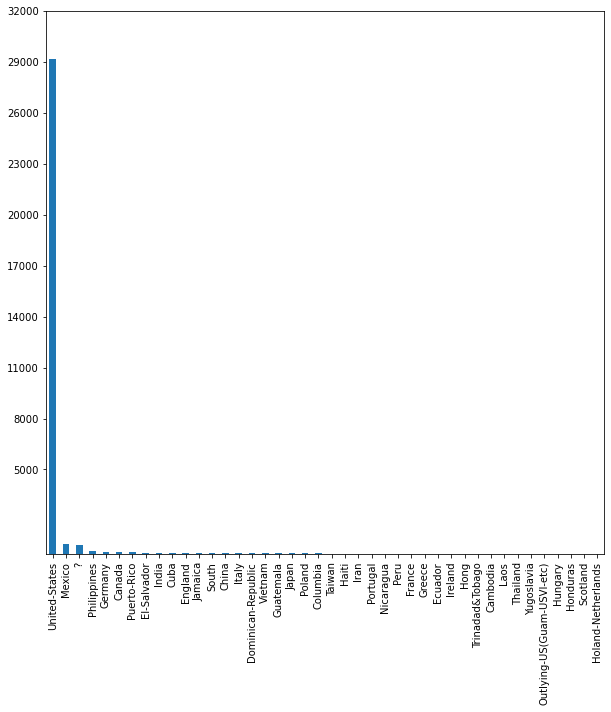

In [17]:
#native-country

df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

### Data cleaning

In [18]:
#findind the record where '?' appears in columns occupation, workclass, and native-country

df.loc[(df['occupation'] == '?') | (df['workclass'] == '?') | (df['native-country'] == '?')]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [19]:
#removing the records that contains the question mark '?'

df.drop(df[df['workclass'] == '?'].index, inplace = True)
df.drop(df[df['occupation'] == '?'].index, inplace = True)
df.drop(df[df['native-country'] == '?'].index, inplace = True)
df


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [20]:
#resetting the index after droping those records

df.reset_index(inplace = True,drop=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [21]:
#Moving the salary column to another variable

target = df.pop('salary')
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [22]:
#Changing the order of columns,  hours-per-week was changed to 2nd column

df = df[['age', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']]
df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


### Data Preprocessing

In [23]:
#Converting the categoical values to numerical values

numeric = {}
for i in df.iloc[:,2:].columns:
    df[i], numeric[i] = pd.factorize(df[i])

df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,0,0,0,0,0,0,0,0
1,50,13,1,0,1,1,1,0,0,0
2,38,40,2,1,2,2,0,0,0,0
3,53,40,2,2,1,2,1,1,0,0
4,28,40,2,0,1,3,2,1,1,1


In [24]:
df.shape

(30162, 10)

In [25]:
#normalizing data

scaler = StandardScaler()
df = scaler.fit_transform(df.values)

In [26]:
#Splittin data

x_train, x_test, y_train, y_test = train_test_split(df,target)


### Logistic Regression

In [27]:
classifier_linear = LogisticRegression().fit(x_train,y_train)
classifier_linear.score(x_test,y_test)


0.7674048534677098

In [28]:
print(classification_report(y_test, classifier_linear.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.79      0.94      0.86      5665
        >50K       0.58      0.24      0.34      1876

    accuracy                           0.77      7541
   macro avg       0.68      0.59      0.60      7541
weighted avg       0.74      0.77      0.73      7541



#### Hyper parameter tuning for Logistic Regression

In [29]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.958333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
classifier_linear = LogisticRegression(penalty = grid_result.best_params_['penalty'], C = grid_result.best_params_['C'], solver =grid_result.best_params_['solver']).fit(x_train, y_train)
lg=classifier_linear.score(x_test,y_test)
print("Accuracy=",lg)

Accuracy= 0.7670070282455907


In [31]:
print(classification_report(y_test,classifier_linear.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.79      0.94      0.86      5665
        >50K       0.58      0.23      0.33      1876

    accuracy                           0.77      7541
   macro avg       0.68      0.59      0.59      7541
weighted avg       0.74      0.77      0.73      7541



### K Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
classifier_knn.score(x_test,y_test)

0.7997613048667286

In [34]:
print(classification_report(y_test, classifier_knn.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      5665
        >50K       0.61      0.55      0.58      1876

    accuracy                           0.80      7541
   macro avg       0.73      0.72      0.72      7541
weighted avg       0.79      0.80      0.80      7541



#### Hyper parameter Tuning for KNN

In [35]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.820123 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [36]:
classifier_knn = KNeighborsClassifier(n_neighbors =grid_result.best_params_['n_neighbors'],metric =grid_result.best_params_['metric'], weights = grid_result.best_params_['weights']).fit(x_train, y_train)
prediction = classifier_knn.predict(x_test)
kn=classifier_knn.score(x_test,y_test)
print("Accuracy=",kn)


Accuracy= 0.8201829996021748


In [37]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      5665
        >50K       0.66      0.58      0.61      1876

    accuracy                           0.82      7541
   macro avg       0.76      0.74      0.75      7541
weighted avg       0.81      0.82      0.82      7541



### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

classifier_random = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_random.fit(x_train, y_train)
y_pred = classifier_random.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.87      5665
        >50K       0.63      0.52      0.57      1876

    accuracy                           0.80      7541
   macro avg       0.74      0.71      0.72      7541
weighted avg       0.79      0.80      0.80      7541



In [39]:
classifier_random.score(x_test,y_test)

0.8045352075321576

#### Hyper parameter tuning for Random Forest

In [40]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.818561 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.811635 (0.009251) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.817087 (0.007919) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.818561 (0.007716) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.810633 (0.007170) with: {'max_features': 'log2', 'n_estimators': 10}
0.817544 (0.007553) with: {'max_features': 'log2', 'n_estimators': 100}
0.818222 (0.007550) with: {'max_features': 'log2', 'n_estimators': 1000}


In [41]:
classifier_random = RandomForestClassifier(max_features= grid_result.best_params_["max_features"], n_estimators= grid_result.best_params_["n_estimators"]).fit(x_train, y_train)
prediction = classifier_random.predict(x_test)
rn=classifier_random.score(x_test,y_test)
print("Accuracy=",rn)

Accuracy= 0.8078504177164832


In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.88      5665
        >50K       0.63      0.54      0.58      1876

    accuracy                           0.81      7541
   macro avg       0.74      0.72      0.73      7541
weighted avg       0.80      0.81      0.80      7541



### Support Vector Classifier

In [43]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear')
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = classifier_svc.predict(x_test)

In [45]:
sv=classifier_svc.score(x_test,y_test)
print(sv)

0.7512266277682005


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5665
        >50K       0.00      0.00      0.00      1876

    accuracy                           0.75      7541
   macro avg       0.38      0.50      0.43      7541
weighted avg       0.56      0.75      0.64      7541



C:\Users\harik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Hyper parameter tuning for SVC

In [47]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.801, total=  12.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.791, total=  13.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.790, total=  12.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=  10.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.793, total=  10.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.793, total=   5.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.784, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   5.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 50.0min finished


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [48]:
classifier_svc = SVC(C= grid.best_params_["C"],gamma= grid.best_params_['gamma']).fit(x_train, y_train)
prediction = classifier_svc.predict(x_test)
sv=classifier_svc.score(x_test,y_test)
print("Accuracy=",sv)
print(classification_report(y_test, prediction))

Accuracy= 0.8140830128630155
              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      5665
        >50K       0.68      0.48      0.56      1876

    accuracy                           0.81      7541
   macro avg       0.76      0.70      0.72      7541
weighted avg       0.80      0.81      0.80      7541



### Comparison of Logistic Regression, KNN, Random Forest, SVC

In [49]:
from tabulate import tabulate

In [50]:
table = [['Model', 'Accuracy'], ['Logistic Regression',lg], ['KNN', kn], ['Random Forest',rn],["SVC",sv]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.767007 │
├─────────────────────┼────────────┤
│ KNN                 │   0.820183 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.80785  │
├─────────────────────┼────────────┤
│ SVC                 │   0.814083 │
╘═════════════════════╧════════════╛


### Predicting the salary on a random user input

In [51]:
import pandas as pd
l1 = []
print("Enter the Details\n\n1.Age\n2.Hours-per-weenk\n3.WorkClass\n4.Education\n5.Marital-status\n6.Occupation\n7.Relationship\n8.Race\n9.Sex\n10.Native-country\n\n")
print("-------------------------------------------")
for i in range(10):
    l1.append(input())
l2=['age','hours-per-week','workclass','education','marital-status','occupation','relationship','race','sex','native-country']
res = {l2[i]: l1[i] for i in range(len(l1))}
print(res)
df1=pd.DataFrame(res,index=["1",])
numeric = {}
for i in df1.iloc[:,2:].columns:
    df1[i], numeric[i] = pd.factorize(df1[i])
df1 = scaler.fit_transform(df1.values)    

Enter the Details

1.Age
2.Hours-per-weenk
3.WorkClass
4.Education
5.Marital-status
6.Occupation
7.Relationship
8.Race
9.Sex
10.Native-country


-------------------------------------------
40
50
Central
Bachelors
Married
Armed Force
Family
Black
Female
United States
{'age': '40', 'hours-per-week': '50', 'workclass': 'Central', 'education': 'Bachelors', 'marital-status': 'Married', 'occupation': 'Armed Force', 'relationship': 'Family', 'race': 'Black', 'sex': 'Female', 'native-country': 'United States'}


In [53]:
prediction = classifier_knn.predict(df1)

In [54]:
print("The salary will be",prediction[0])

The salary will be >50K
